## 📌 Description
### This notebook presents a detailed exploratory data analysis (EDA) and visualization on the Wine Quality dataset. The goal is to understand how different physicochemical properties affect the perceived wine quality.
#### The dataset includes 12 features such as acidity, sugar content, alcohol, and more, along with a quality score ranging from 0 to 10. This notebook provides a visual overview of distributions, correlations, and relationships between variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/kaggle/input/wine-quality-dataset/WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


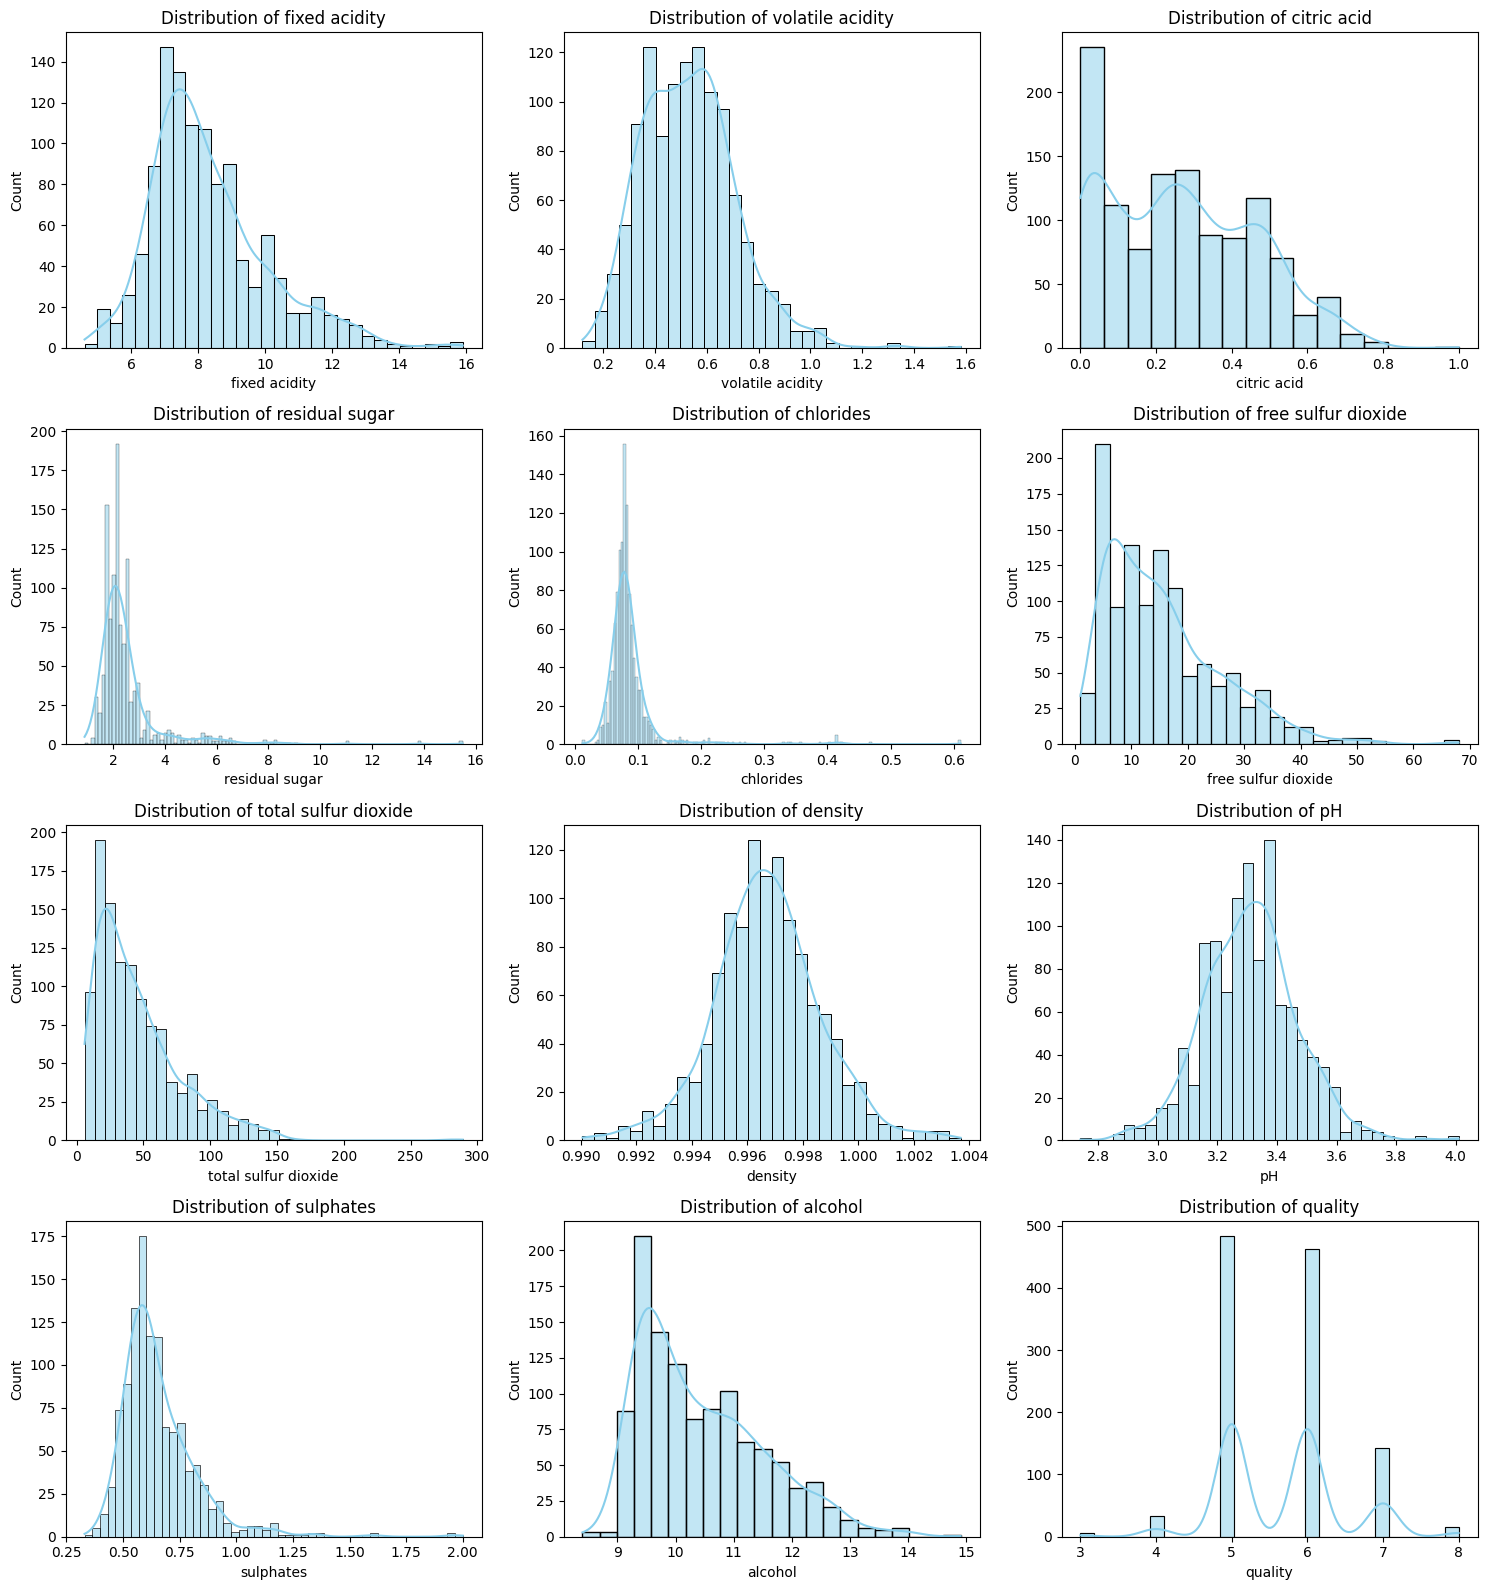

In [4]:
numeric_columns = data.select_dtypes(include='number').drop(columns='Id').columns

# Subplot grid settings
n_cols = 3  
n_rows = -(-len(numeric_columns) // n_cols) 

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


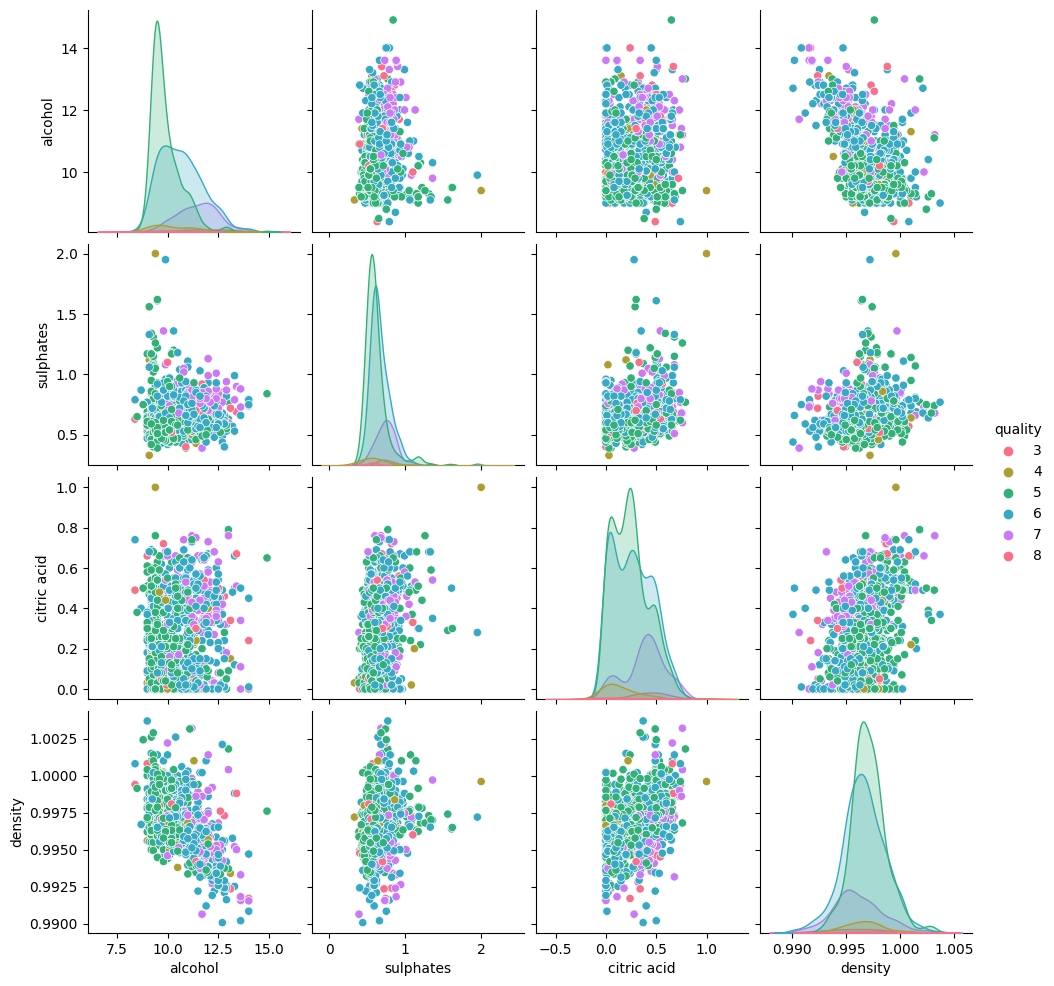

In [5]:
selected_features = ['alcohol', 'sulphates', 'citric acid', 'density', 'quality']
sns.pairplot(data[selected_features], hue='quality', palette='husl')
plt.show()

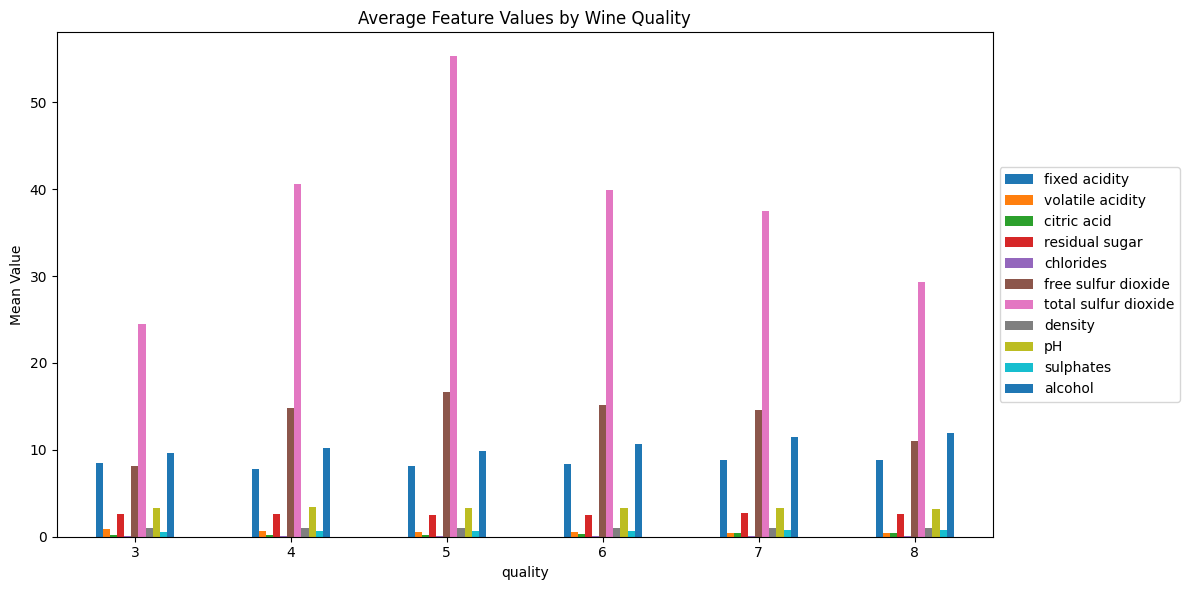

In [6]:
data.drop(columns="Id").groupby('quality').mean().plot(kind='bar', figsize=(12, 6))
plt.title('Average Feature Values by Wine Quality')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

<Axes: >

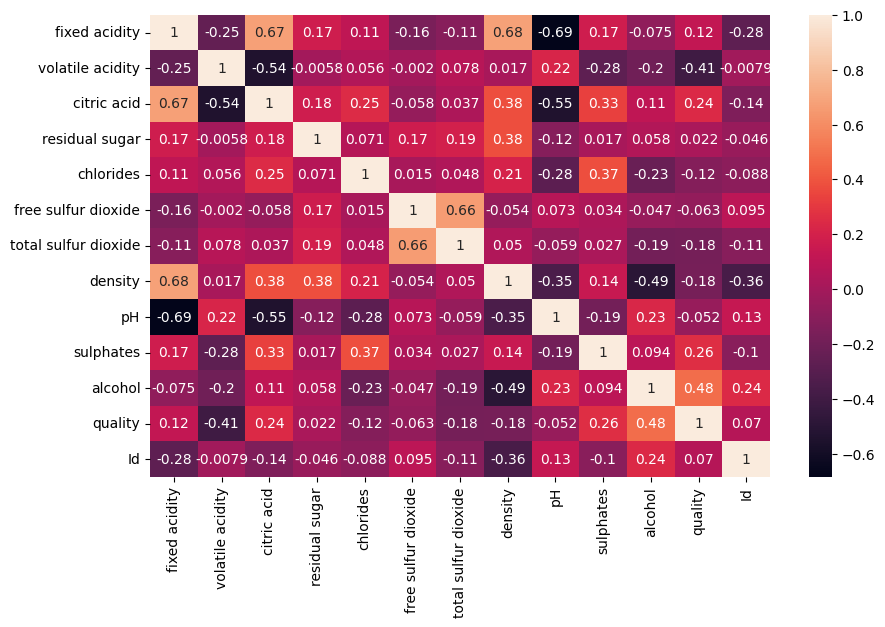

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

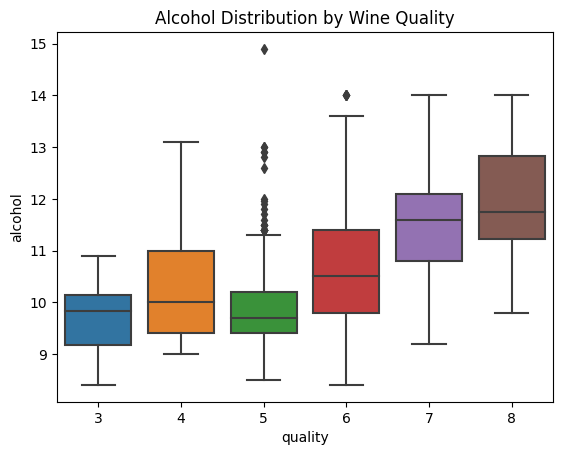

In [8]:

sns.boxplot(x='quality', y='alcohol', data=data)
plt.title('Alcohol Distribution by Wine Quality')
plt.show()

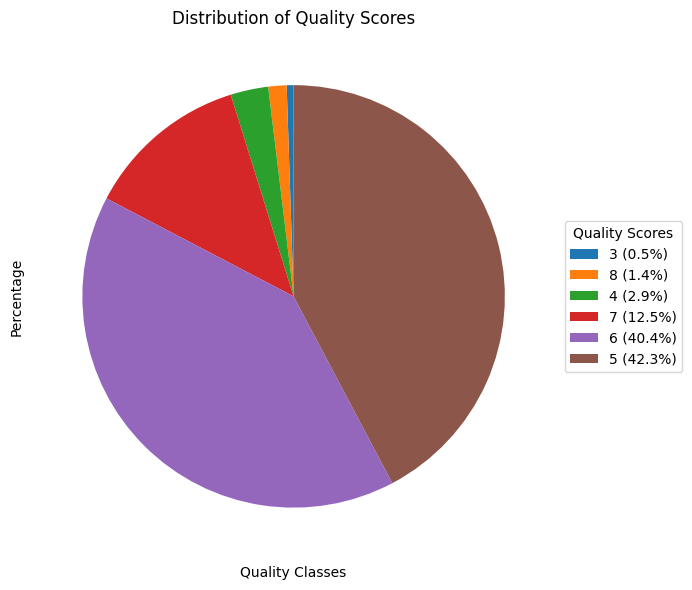

In [9]:
data_qualityScoreCount = data["quality"].value_counts().sort_values()

labels = data_qualityScoreCount.index
sizes = data_qualityScoreCount.values
total = sum(sizes)

# Pie chart
plt.figure(1, (10, 6))
wedges, texts = plt.pie(
    sizes,
    labels=None,               
    startangle=90,
    shadow=False
)
legend_labels = [f"{label} ({size / total:.1%})" for label, size in zip(labels, sizes)]

plt.legend(
    wedges,
    legend_labels,
    title="Quality Scores",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Başlık ve eksen adları (Pie'da eksenler sembolik)
plt.xlabel('Quality Classes')
plt.ylabel('Percentage')
plt.title('Distribution of Quality Scores')

plt.tight_layout()
plt.show()

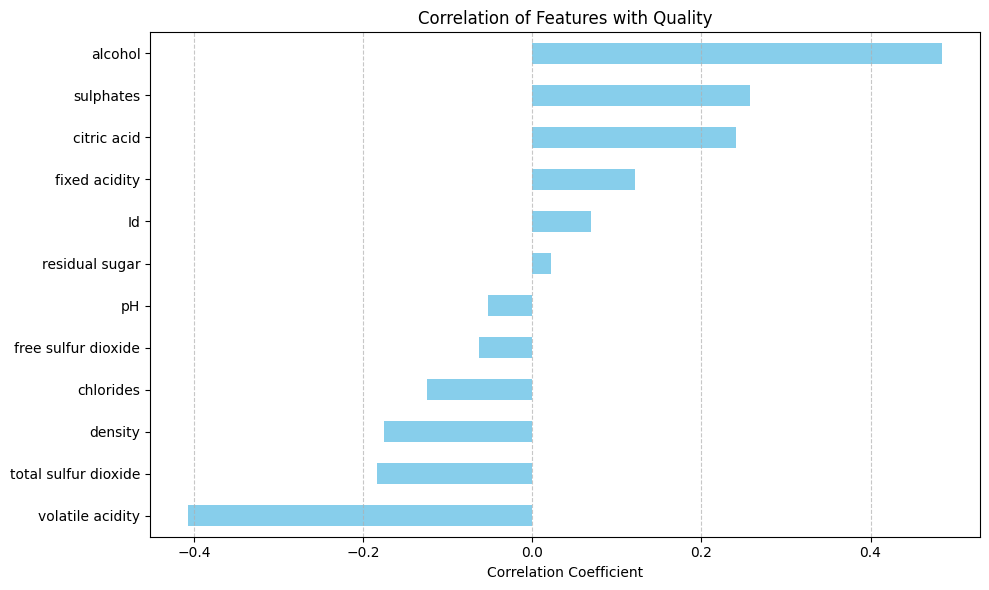

In [10]:
plt.figure(1,(10,6))
correlation_with_quality = data.corr()['quality'].drop('quality').sort_values(ascending=True)
correlation_with_quality.plot(kind='barh', color='skyblue')
plt.xlabel('Correlation Coefficient')
plt.title('Correlation of Features with Quality')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

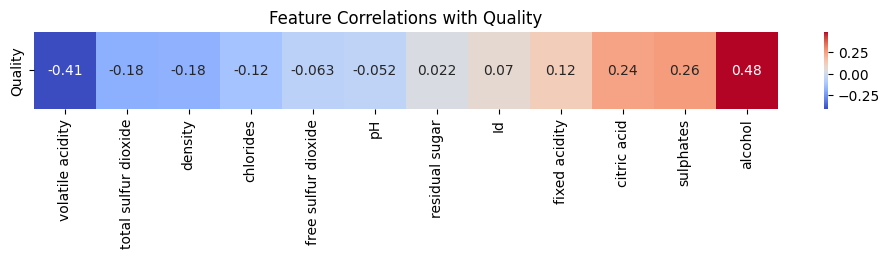

In [11]:
plt.figure(figsize=(12, 1))  # Tek satır heatmap için boyut
sns.heatmap([correlation_with_quality.values],
            annot=True, cmap='coolwarm', xticklabels=correlation_with_quality.index, yticklabels=["Quality"])
plt.title("Feature Correlations with Quality")
plt.show()